In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from scipy.io import arff
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
file_path = '/content/drive/My Drive/SEE/rawData/kemerer.arff'

data, meta = arff.loadarff(file_path)
df = pd.DataFrame(data)
df.to_csv('/content/drive/My Drive/SEE/rawData/kemerer.csv', index = False)

df = pd.read_csv('/content/drive/My Drive/SEE/rawData/kemerer.csv')
print(df.head())
print(df.dtypes)
print(df.describe())

    ID  Language  Hardware  Duration  KSLOC   AdjFP   RAWFP  EffortMM
0  1.0       1.0       1.0      17.0  253.6  1217.1  1010.0    287.00
1  2.0       1.0       2.0       7.0   40.5   507.3   457.0     82.50
2  3.0       1.0       3.0      15.0  450.0  2306.8  2284.0   1107.31
3  4.0       1.0       1.0      18.0  214.4   788.5   881.0     86.90
4  5.0       1.0       2.0      13.0  449.9  1337.6  1583.0    336.30
ID          float64
Language    float64
Hardware    float64
Duration    float64
KSLOC       float64
AdjFP       float64
RAWFP       float64
EffortMM    float64
dtype: object
              ID   Language   Hardware   Duration       KSLOC        AdjFP  \
count  15.000000  15.000000  15.000000  15.000000   15.000000    15.000000   
mean    8.000000   1.200000   2.333333  14.266667  186.573333   999.140000   
std     4.472136   0.560612   1.676163   7.544787  136.817420   589.592082   
min     1.000000   1.000000   1.000000   5.000000   39.000000    99.900000   
25%     4.500000

### Clip outliers

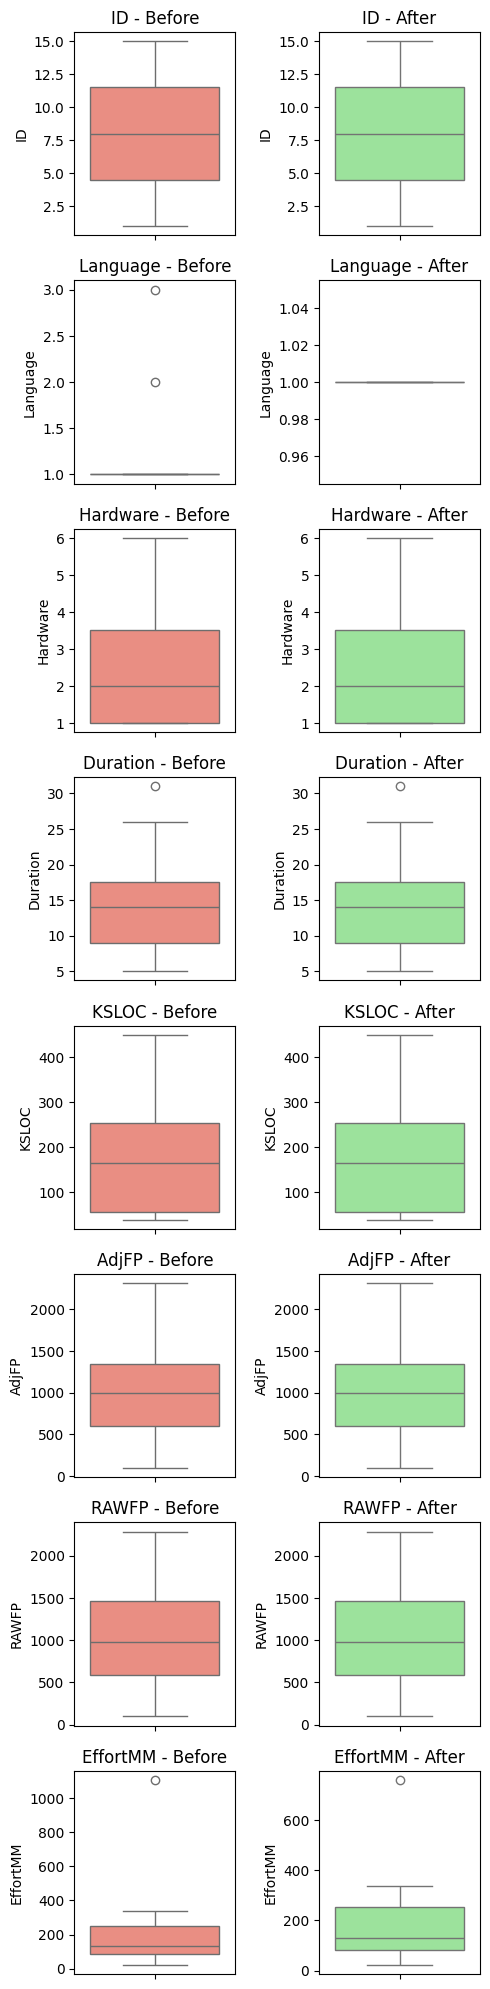

In [ ]:
# def clip_outliers(df, whisker_coeff):
#     df_clipped = df.copy()
#     numeric_cols = df.select_dtypes(include='float64').columns

#     for col in numeric_cols:
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower = Q1 - whisker_coeff * IQR
#         upper = Q3 + whisker_coeff * IQR

#         df_clipped[col] = df[col].clip(lower, upper)

#     return df_clipped

# def plot_all_boxplots(original_df, clipped_df):
#     numeric_cols = original_df.select_dtypes(include='float64').columns
#     num_cols = len(numeric_cols)

#     fig, axes = plt.subplots(num_cols, 2, figsize=(5, 20))

#     for i, col in enumerate(numeric_cols):
#         sns.boxplot(y=original_df[col], ax=axes[i][0], color='salmon')
#         axes[i][0].set_title(f'{col} - Before')

#         sns.boxplot(y=clipped_df[col], ax=axes[i][1], color='lightgreen')
#         axes[i][1].set_title(f'{col} - After')

#     plt.tight_layout()
#     plt.show()

# df_clipped = clip_outliers(df, whisker_coeff=3)
# plot_all_boxplots(df, df_clipped)


<Axes: >

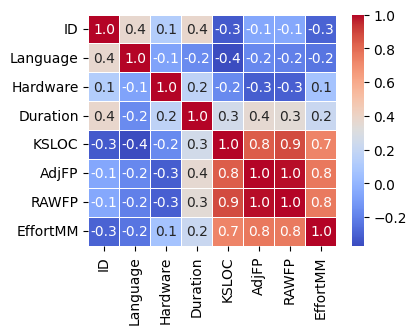

In [ ]:
f, ax = plt.subplots(figsize=(4, 3))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax, cmap='coolwarm')

### Split + Scaler

In [ ]:
X = df.drop(columns=['EffortMM', 'ID']).values
y = df['EffortMM'].values.reshape(-1, 1)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_normalized = scaler_X.fit_transform(X)
y_normalized = scaler_y.fit_transform(y)

# X_reshaped = X_normalized.reshape((X_normalized.shape[0], X_normalized.shape[1], 1))
X_reshaped = X_normalized

X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_normalized, test_size=0.2, random_state=42)

### Inverse

In [ ]:
def rescaled(true_values, predicted_values):
    true_rescaled = scaler_y.inverse_transform(true_values.reshape(-1, 1)).flatten()
    predicted_rescaled = scaler_y.inverse_transform(predicted_values.reshape(-1, 1)).flatten()

    return true_rescaled, predicted_rescaled

### Evaluate metrics

In [ ]:
def evaluate_metrics(true_values, predicted_values):
    true_values = np.array(true_values).flatten()
    predicted_values = np.array(predicted_values).flatten()

    mae = mean_absolute_error(true_values, predicted_values)
    mse = mean_squared_error(true_values, predicted_values)
    rmse = np.sqrt(mse)
    r2 = r2_score(true_values, predicted_values)
    mre = np.absolute(true_values - predicted_values) / true_values
    mmre = np.mean(mre)
    mdmre = np.median(mre)
    p = mre[mre<0.25]
    pred = (p.size/mre.size) * 100

    return {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'MMRE': mmre,
        'MdMRE': mdmre,
        'PRED(25)': pred
    }